In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import TSNE
import seaborn as sns

In [24]:
df_type = pd.read_excel('../train/classif.xlsx', header=0)

In [25]:
df_type

,bug type,species
0,Bee,Apis mellifera
1,Bee,Apis mellifera
2,Bee,Apis mellifera
3,Bee,Apis mellifera
4,Bee,Apis mellifera
...,...,...
245,Bee,Apis mellifera
246,Bee,Apis mellifera
247,Bee,Apis mellifera
248,Bee,Apis mellifera


C:\Users\Romain Chevrollier\AppData\Local\Temp\ipykernel_28576\2227890709.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', 26)


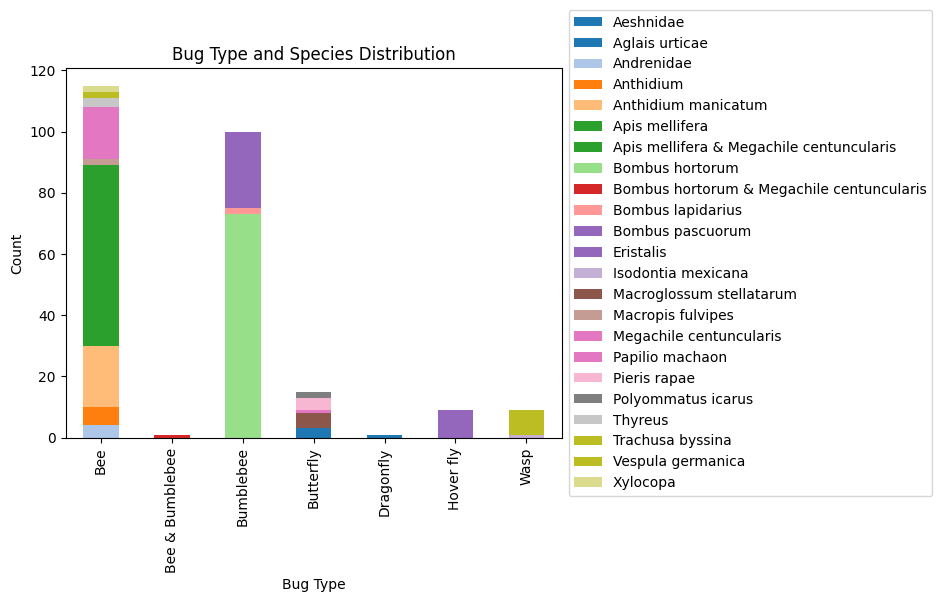

In [26]:
# Define a colormap with 26 different colors
cmap = plt.cm.get_cmap('tab20', 26)

# Generate a list of colors from the colormap
colors = [cmap(i) for i in np.linspace(0, 1, 26)]
# Plot the stacked bar chart with unique colors for each species
ax = df_type[['bug type', 'species']].value_counts().unstack().plot(kind='bar', stacked=True, color=colors)

# Add legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel('Bug Type')
plt.ylabel('Count')
plt.title('Bug Type and Species Distribution')
plt.show()



As we can see there is 4 classes that are outnumbered by bee and bumblebee. Because of it we will regroup them into the same category named "other"

In [27]:
df_type['bug type'] = df_type['bug type'].replace(['Butterfly', 'Dragonfly', 'Hover fly', 'Wasp', 'Bee & Bumblebee'], 'other')

C:\Users\Romain Chevrollier\AppData\Local\Temp\ipykernel_28576\3228346031.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', 26)


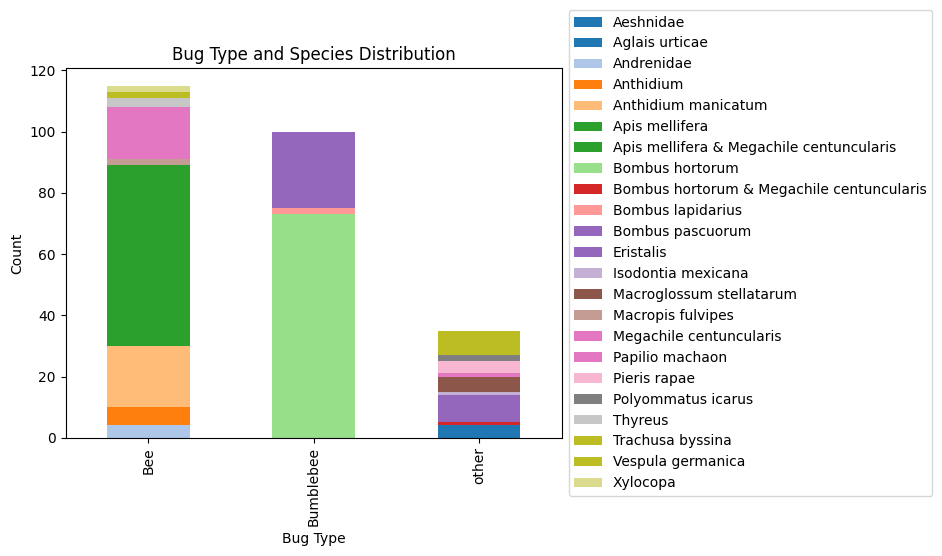

In [28]:
# Define a colormap with 26 different colors
cmap = plt.cm.get_cmap('tab20', 26)

# Generate a list of colors from the colormap
colors = [cmap(i) for i in np.linspace(0, 1, 26)]
# Plot the stacked bar chart with unique colors for each species
ax = df_type[['bug type', 'species']].value_counts().unstack().plot(kind='bar', stacked=True, color=colors)

# Add legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel('Bug Type')
plt.ylabel('Count')
plt.title('Bug Type and Species Distribution')
plt.show()


In [29]:
# df_type.to_csv('Classif.csv', index=False)

In [51]:
df = pd.read_csv('dataframe_250.csv')
df

,symmetry,longest_ortho_ratio,num_pixels_ratio,red_min,red_max,red_mean,red_median,red_std,green_min,green_max,...,green_std,blue_min,blue_max,blue_mean,blue_median,blue_std,ecc,campactness,kurt,skewness
0,0.288274,0.837457,0.002516,5.0,208.0,68.749506,57.0,48.239988,3.0,199.0,...,45.736010,0.0,193.0,40.433209,24.0,36.701656,0.388091,175.187187,404.728662,18.967235
1,0.327541,0.685837,0.002891,2.0,248.0,64.560638,56.0,42.435025,2.0,251.0,...,43.254608,0.0,244.0,36.428700,19.0,34.992745,0.595575,173.779622,319.590412,17.050182
2,0.338071,0.806587,0.007395,3.0,255.0,107.320344,115.0,58.736815,0.0,255.0,...,60.055950,0.0,255.0,63.508531,52.0,54.819316,0.236830,163.110604,94.815650,9.398343
3,0.384825,0.710961,0.004452,5.0,219.0,88.170607,89.0,46.403770,3.0,213.0,...,46.297466,0.0,201.0,51.065063,37.0,37.797139,0.735058,185.485679,152.026536,11.942614
4,0.406315,0.749827,0.003075,6.0,255.0,123.546796,134.0,62.406482,0.0,250.0,...,63.138573,0.0,245.0,81.362602,64.0,60.768198,0.650280,178.432243,201.420614,13.846053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,0.346617,0.984803,0.002083,7.0,214.0,98.700785,98.0,46.799467,7.0,208.0,...,43.466326,0.0,204.0,55.657727,47.0,38.473859,0.776278,49.150425,330.301488,17.376983
245,0.371266,0.714982,0.006683,7.0,255.0,89.277366,82.0,52.397726,2.0,255.0,...,46.710060,0.0,255.0,56.712233,46.0,39.267959,0.752551,59.147159,129.485917,10.599586
246,0.618560,0.773536,0.002344,5.0,252.0,79.894225,60.0,54.355815,4.0,239.0,...,52.164212,0.0,233.0,57.192094,31.0,51.857752,0.648535,72.740075,393.858701,18.961989
247,0.499115,0.944126,0.003986,6.0,255.0,140.451749,141.0,57.828557,3.0,255.0,...,52.958137,3.0,255.0,103.180300,102.0,53.474601,0.389568,40.038022,135.044259,11.239667


In [52]:
df_class = df.copy()
df_class['bug type'] = df_type['bug type']
df_class

,symmetry,longest_ortho_ratio,num_pixels_ratio,red_min,red_max,red_mean,red_median,red_std,green_min,green_max,...,blue_min,blue_max,blue_mean,blue_median,blue_std,ecc,campactness,kurt,skewness,bug type
0,0.288274,0.837457,0.002516,5.0,208.0,68.749506,57.0,48.239988,3.0,199.0,...,0.0,193.0,40.433209,24.0,36.701656,0.388091,175.187187,404.728662,18.967235,Bee
1,0.327541,0.685837,0.002891,2.0,248.0,64.560638,56.0,42.435025,2.0,251.0,...,0.0,244.0,36.428700,19.0,34.992745,0.595575,173.779622,319.590412,17.050182,Bee
2,0.338071,0.806587,0.007395,3.0,255.0,107.320344,115.0,58.736815,0.0,255.0,...,0.0,255.0,63.508531,52.0,54.819316,0.236830,163.110604,94.815650,9.398343,Bee
3,0.384825,0.710961,0.004452,5.0,219.0,88.170607,89.0,46.403770,3.0,213.0,...,0.0,201.0,51.065063,37.0,37.797139,0.735058,185.485679,152.026536,11.942614,Bee
4,0.406315,0.749827,0.003075,6.0,255.0,123.546796,134.0,62.406482,0.0,250.0,...,0.0,245.0,81.362602,64.0,60.768198,0.650280,178.432243,201.420614,13.846053,Bee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,0.346617,0.984803,0.002083,7.0,214.0,98.700785,98.0,46.799467,7.0,208.0,...,0.0,204.0,55.657727,47.0,38.473859,0.776278,49.150425,330.301488,17.376983,Bee
245,0.371266,0.714982,0.006683,7.0,255.0,89.277366,82.0,52.397726,2.0,255.0,...,0.0,255.0,56.712233,46.0,39.267959,0.752551,59.147159,129.485917,10.599586,Bee
246,0.618560,0.773536,0.002344,5.0,252.0,79.894225,60.0,54.355815,4.0,239.0,...,0.0,233.0,57.192094,31.0,51.857752,0.648535,72.740075,393.858701,18.961989,Bee
247,0.499115,0.944126,0.003986,6.0,255.0,140.451749,141.0,57.828557,3.0,255.0,...,3.0,255.0,103.180300,102.0,53.474601,0.389568,40.038022,135.044259,11.239667,Bee


In [53]:
feat_names = df_class.columns.tolist()
feat_names.remove("bug type")
print(feat_names)

['symmetry', 'longest_ortho_ratio', 'num_pixels_ratio', 'red_min', 'red_max', 'red_mean', 'red_median', 'red_std', 'green_min', 'green_max', 'green_mean', 'green_median', 'green_std', 'blue_min', 'blue_max', 'blue_mean', 'blue_median', 'blue_std', 'ecc', 'campactness', 'kurt', 'skewness']


In [33]:
# scaler = StandardScaler()
# dfn  = df.copy()
# dfn[feat_names] = scaler.fit_transform(dfn[feat_names])
# dfn

In [34]:
# Instantiate the PCA object
pca = PCA()

# Fit the PCA model to the data
dfn_pca = pca.fit_transform(df_class[feat_names])
dfn_pca


array([[ 2.78878405e+02,  4.50481162e+01,  1.08992530e+02, ...,
        -2.73430280e-01,  5.65191954e-02, -5.17917296e-04],
       [ 2.01918751e+02,  6.34383056e+00,  9.87307137e+01, ...,
        -1.12304396e-01,  5.26710613e-02,  3.06993024e-03],
       [-4.64710988e+01, -4.43638866e-01,  9.58508552e+01, ...,
        -1.82558177e-01,  1.82592405e-01,  4.90894142e-04],
       ...,
       [ 2.54687731e+02,  4.92767217e+01, -6.47486418e+00, ...,
         2.44423221e-01,  5.77894931e-02, -3.98361282e-04],
       [-5.10386583e+01,  7.80241562e+01, -3.25560649e+01, ...,
         9.05723772e-02,  1.03724493e-01,  9.11001303e-04],
       [-7.20445310e+01,  1.05673906e+01, -1.95592438e+01, ...,
         1.00524724e-01,  6.07895563e-02, -1.59551761e-03]])

In [35]:
# dfn_pca = pd.DataFrame(dfn_pca)
# dfn_pca

In [36]:
explained_variances = []
for i in range(len(pca.explained_variance_ratio_)):
    explained_variances.append(round(pca.explained_variance_ratio_[i] * 100, 2))
explained_variances


[58.53,
 25.58,
 7.71,
 4.31,
 1.39,
 0.84,
 0.59,
 0.37,
 0.23,
 0.14,
 0.1,
 0.08,
 0.04,
 0.04,
 0.02,
 0.01,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [37]:
pca.explained_variance_ratio_


array([5.85307809e-01, 2.55818749e-01, 7.70791922e-02, 4.31389859e-02,
       1.39181359e-02, 8.44380871e-03, 5.94524047e-03, 3.71095891e-03,
       2.27956375e-03, 1.41298885e-03, 9.95871164e-04, 7.67149785e-04,
       3.94210577e-04, 3.82808809e-04, 1.60539763e-04, 1.32953582e-04,
       8.81901433e-05, 2.02222106e-05, 1.63209776e-06, 6.63774902e-07,
       3.24862492e-07, 3.70761795e-10])

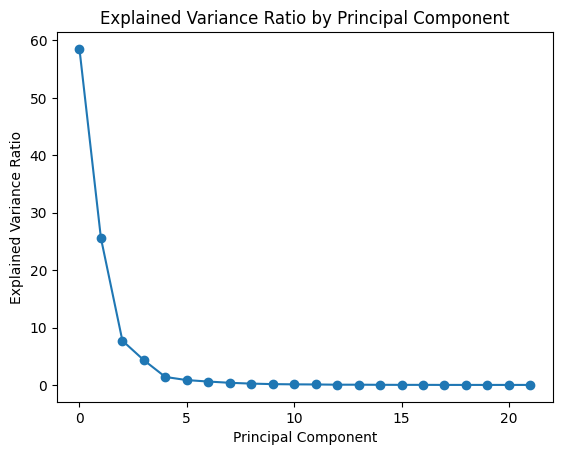

In [38]:
plt.scatter(range(len(explained_variances)), explained_variances)
plt.plot(range(len(explained_variances)), explained_variances, linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

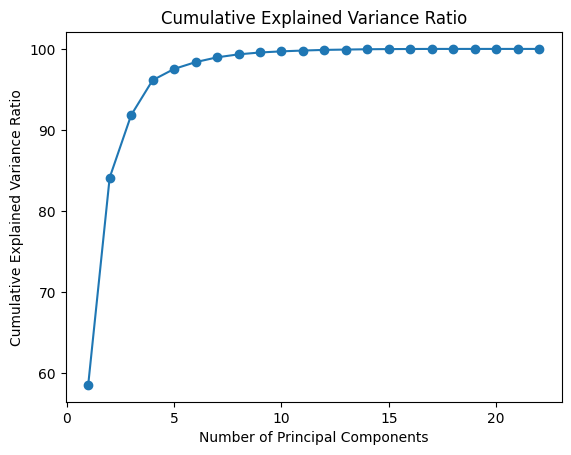

In [39]:
# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variances)

# Create the scatter plot
plt.scatter(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio)

# Add a line to link each point
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio)

# Set the x-axis label
plt.xlabel('Number of Principal Components')

# Set the y-axis label
plt.ylabel('Cumulative Explained Variance Ratio')

# Set the title
plt.title('Cumulative Explained Variance Ratio')

# Show the plot
plt.show()

We should use the first 4 components

# **PCA**

C:\Users\Romain Chevrollier\AppData\Local\Temp\ipykernel_28576\2323790412.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow', len(bug_types))


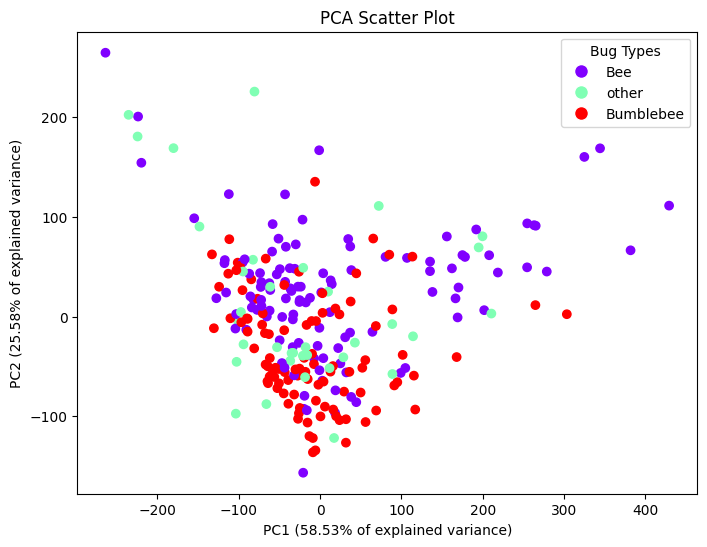

In [40]:
# Assuming `X_pca` is your data transformed by PCA
plt.figure(figsize=(8,6))
bug_types = df_class['bug type'].unique()

# Create a colormap
cmap = cm.get_cmap('rainbow', len(bug_types))

color_dict = {bug_type: cmap(i) for i, bug_type in enumerate(bug_types)}
scatter = plt.scatter(dfn_pca[:,0], dfn_pca[:,1], c=df_class['bug type'].map(color_dict))

# Create legend handles manually
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict[bug_type], markersize=10) for bug_type in bug_types]
plt.legend(handles, bug_types, title="Bug Types")
plt.xlabel("PC1 ({0}% of explained variance)".format(explained_variances[0], fontsize=12))
plt.ylabel("PC2 ({0}% of explained variance)".format(explained_variances[1], fontsize=12))
plt.title('PCA Scatter Plot')
plt.show()

# **ISOMAP**

In [41]:
# Assuming you have a dataset X
X = df_class[feat_names]

# Create an instance of Isomap with the desired number of components
isomap = Isomap(n_components=2, n_neighbors=25)

# Fit the Isomap model to the data
X_ISOMAP = isomap.fit_transform(X)

Number of neighbors isn't changing the plot that much

C:\Users\Romain Chevrollier\AppData\Local\Temp\ipykernel_28576\3068699919.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow', len(bug_types))


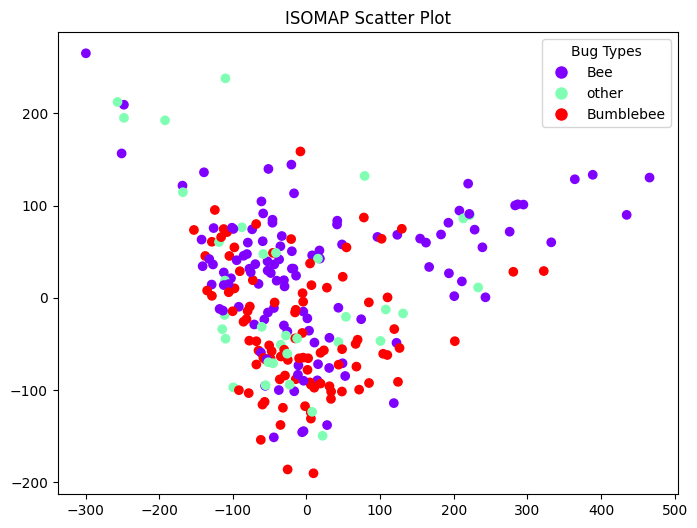

In [42]:
# Assuming `X_pca` is your data transformed by PCA
plt.figure(figsize=(8,6))
bug_types = df_class['bug type'].unique()

# Create a colormap
cmap = cm.get_cmap('rainbow', len(bug_types))

color_dict = {bug_type: cmap(i) for i, bug_type in enumerate(bug_types)}
scatter = plt.scatter(X_ISOMAP[:,0], X_ISOMAP[:,1], c=df_class['bug type'].map(color_dict))

# Create legend handles manually
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict[bug_type], markersize=10) for bug_type in bug_types]
plt.legend(handles, bug_types, title="Bug Types")
# plt.xlabel("PC1 ({0}% of explained variance)".format(explained_variances[0], fontsize=12))
# plt.ylabel("PC2 ({0}% of explained variance)".format(explained_variances[1], fontsize=12))
plt.title('ISOMAP Scatter Plot')
plt.show()

# **Locally Linear Embedding : LLE**

In [43]:
# Assuming X is your input data
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_LLE = lle.fit_transform(X)

Number of neighbors change a lot of things. Needs to be adjusted

C:\Users\Romain Chevrollier\AppData\Local\Temp\ipykernel_28576\1718191795.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow', len(bug_types))


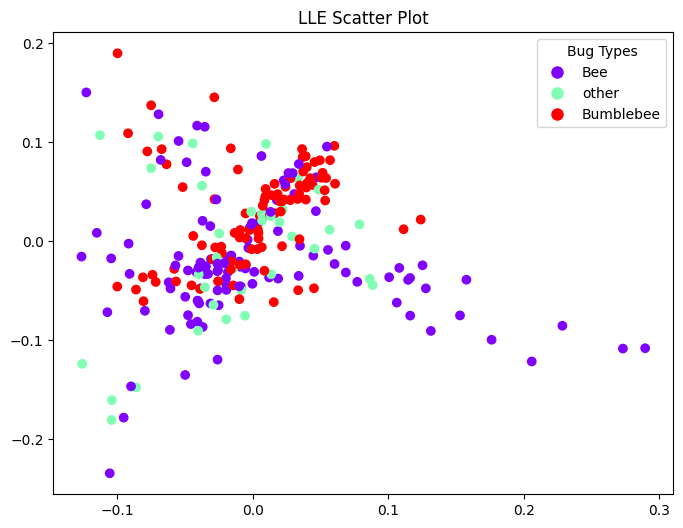

In [44]:
# Assuming `X_pca` is your data transformed by PCA
plt.figure(figsize=(8,6))
bug_types = df_class['bug type'].unique()

# Create a colormap
cmap = cm.get_cmap('rainbow', len(bug_types))

color_dict = {bug_type: cmap(i) for i, bug_type in enumerate(bug_types)}
scatter = plt.scatter(X_LLE[:,0], X_LLE[:,1], c=df_class['bug type'].map(color_dict))

# Create legend handles manually
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict[bug_type], markersize=10) for bug_type in bug_types]
plt.legend(handles, bug_types, title="Bug Types")
# plt.xlabel("PC1 ({0}% of explained variance)".format(explained_variances[0], fontsize=12))
# plt.ylabel("PC2 ({0}% of explained variance)".format(explained_variances[1], fontsize=12))
plt.title('LLE Scatter Plot')
plt.show()

C:\Users\Romain Chevrollier\AppData\Local\Temp\ipykernel_28576\3141387810.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow', len(bug_types))


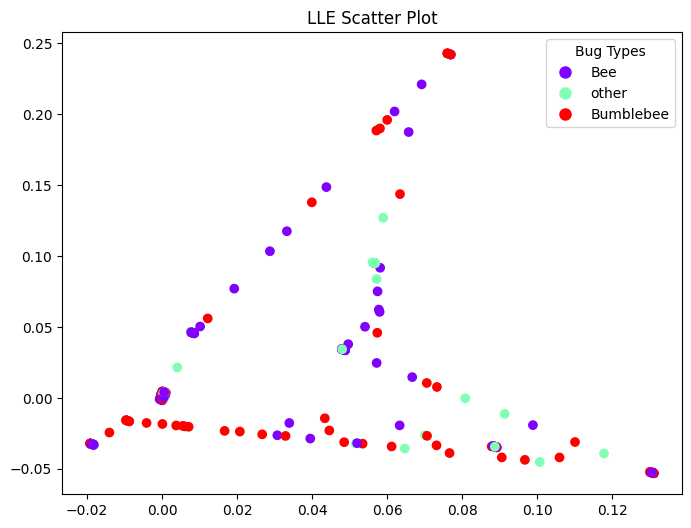

C:\Users\Romain Chevrollier\AppData\Local\Temp\ipykernel_28576\3141387810.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow', len(bug_types))


n-neighbors:  2


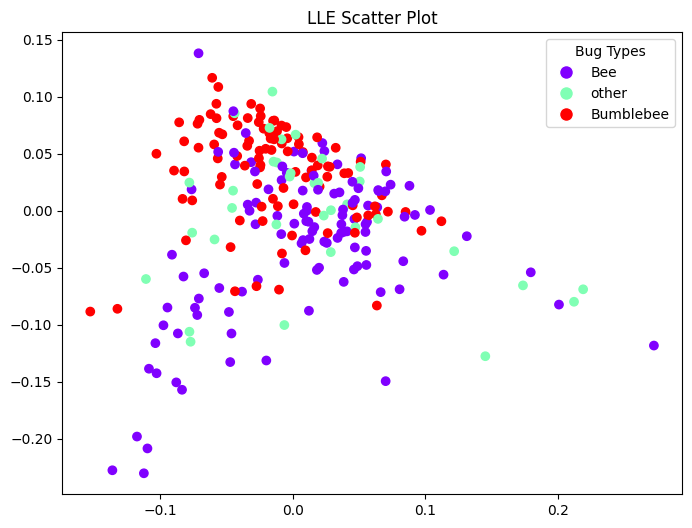

n-neighbors:  27


C:\Users\Romain Chevrollier\AppData\Local\Temp\ipykernel_28576\3141387810.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow', len(bug_types))


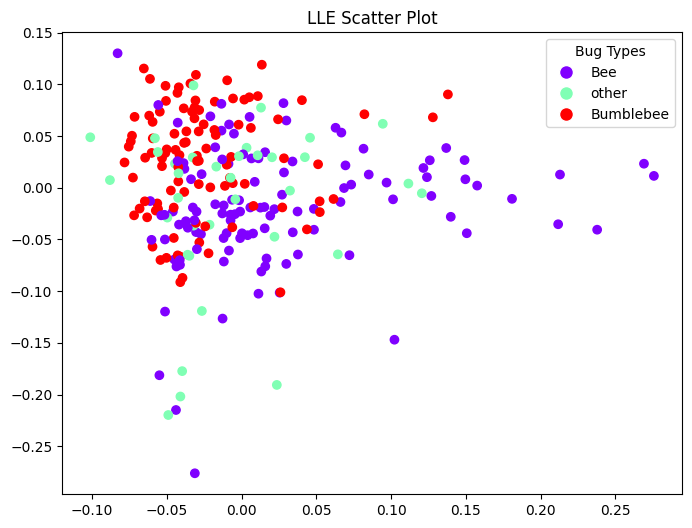

n-neighbors:  52


C:\Users\Romain Chevrollier\AppData\Local\Temp\ipykernel_28576\3141387810.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow', len(bug_types))


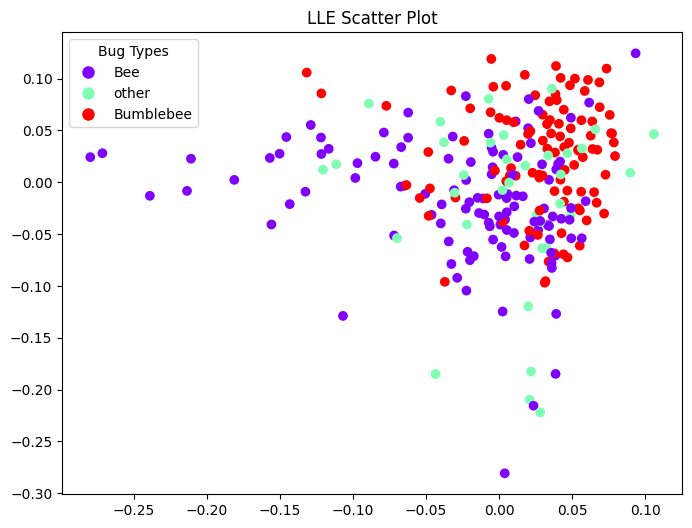

n-neighbors:  77


C:\Users\Romain Chevrollier\AppData\Local\Temp\ipykernel_28576\3141387810.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow', len(bug_types))


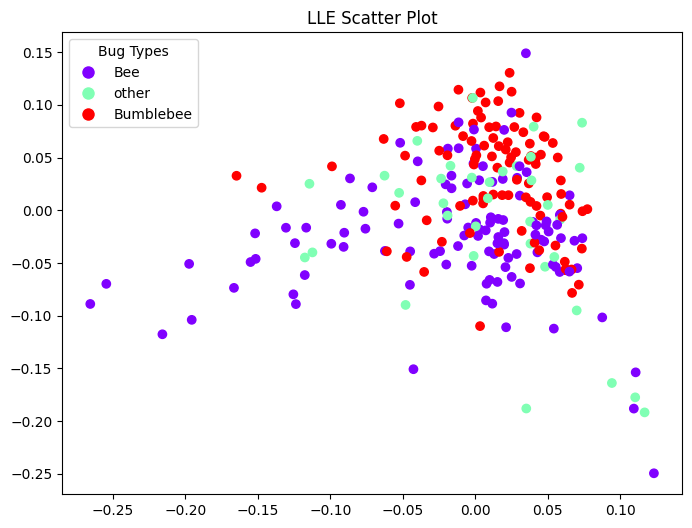

n-neighbors:  102


C:\Users\Romain Chevrollier\AppData\Local\Temp\ipykernel_28576\3141387810.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow', len(bug_types))


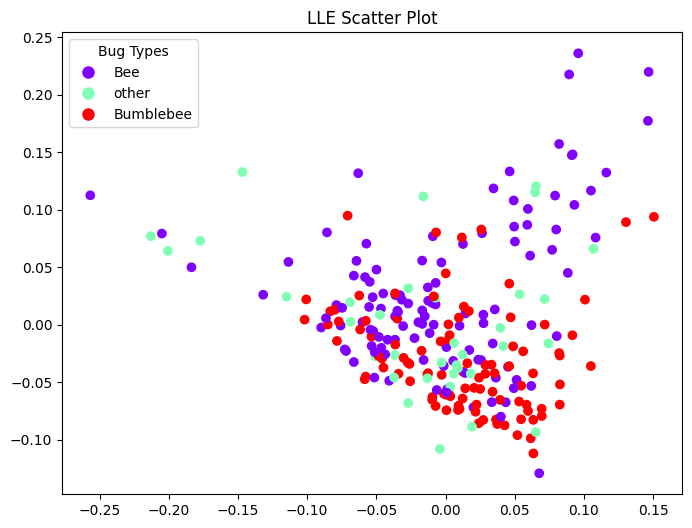

n-neighbors:  127


C:\Users\Romain Chevrollier\AppData\Local\Temp\ipykernel_28576\3141387810.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow', len(bug_types))


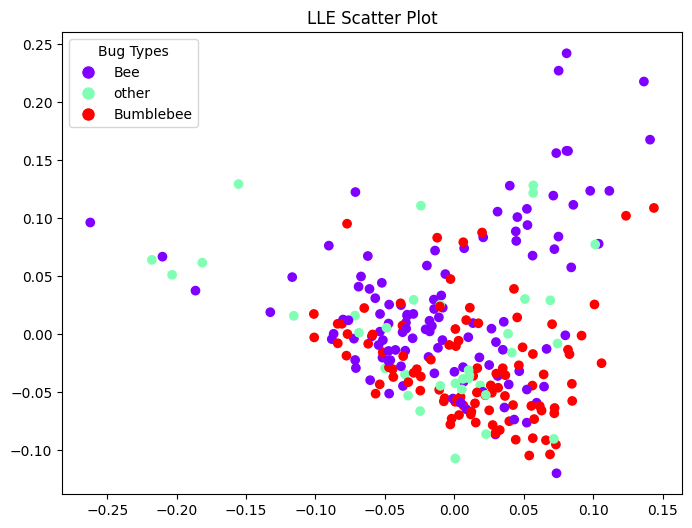

n-neighbors:  152


C:\Users\Romain Chevrollier\AppData\Local\Temp\ipykernel_28576\3141387810.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow', len(bug_types))


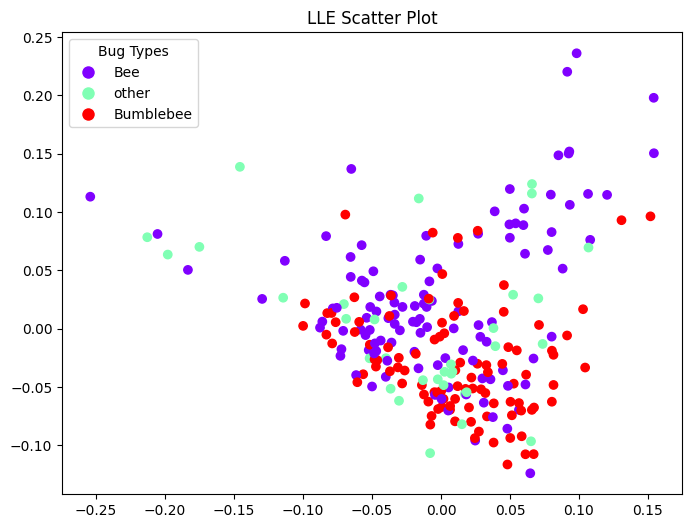

n-neighbors:  177


C:\Users\Romain Chevrollier\AppData\Local\Temp\ipykernel_28576\3141387810.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow', len(bug_types))


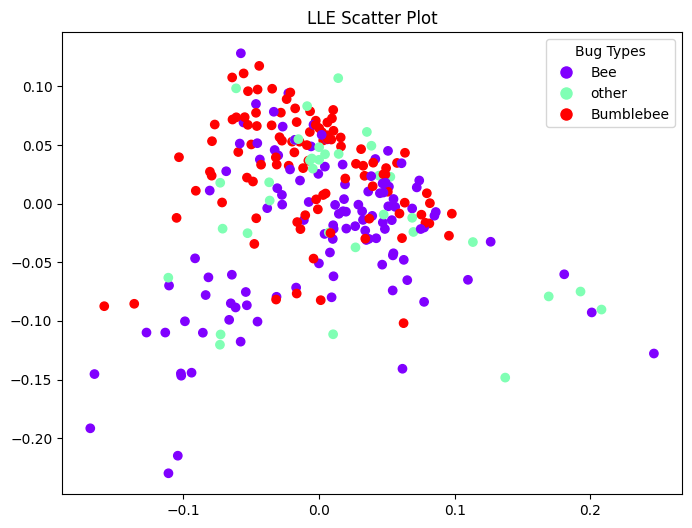

n-neighbors:  202


In [45]:
for i in range(2,203, 25):
    lle = LocallyLinearEmbedding(n_components=2, n_neighbors=i)
    X_LLE = lle.fit_transform(X)
    plt.figure(figsize=(8,6))
    bug_types = df_class['bug type'].unique()

    # Create a colormap
    cmap = cm.get_cmap('rainbow', len(bug_types))

    color_dict = {bug_type: cmap(i) for i, bug_type in enumerate(bug_types)}
    scatter = plt.scatter(X_LLE[:,0], X_LLE[:,1], c=df_class['bug type'].map(color_dict))

    # Create legend handles manually
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict[bug_type], markersize=10) for bug_type in bug_types]
    plt.legend(handles, bug_types, title="Bug Types")
    # plt.xlabel("PC1 ({0}% of explained variance)".format(explained_variances[0], fontsize=12))
    # plt.ylabel("PC2 ({0}% of explained variance)".format(explained_variances[1], fontsize=12))
    plt.title('LLE Scatter Plot')
    plt.show()
    print('n-neighbors: ', i)

# **t-Stochastic Neighbor Embedding : t-SNE**

In [46]:
# Create an instance of TSNE
tsne = TSNE(n_components=2, random_state=0, perplexity=200)

# Fit and transform the data
X_tSNE = tsne.fit_transform(X)

C:\Users\Romain Chevrollier\AppData\Local\Temp\ipykernel_28576\2295716575.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow', len(bug_types))


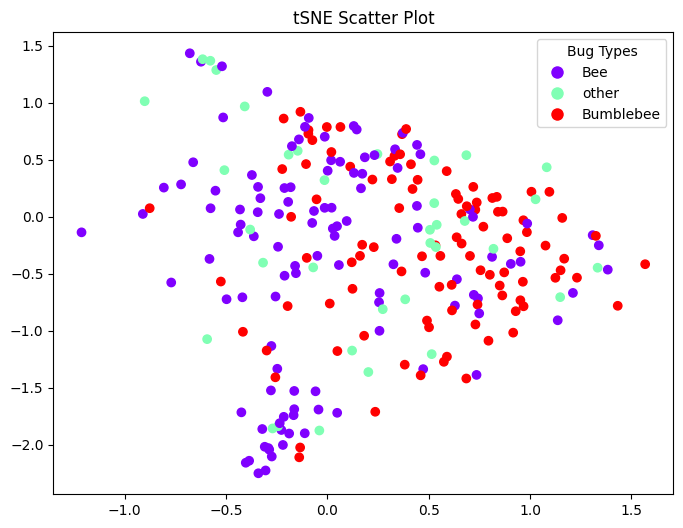

In [47]:
# Assuming `X_pca` is your data transformed by PCA
plt.figure(figsize=(8,6))
bug_types = df_class['bug type'].unique()

# Create a colormap
cmap = cm.get_cmap('rainbow', len(bug_types))

color_dict = {bug_type: cmap(i) for i, bug_type in enumerate(bug_types)}
scatter = plt.scatter(X_tSNE[:,0], X_tSNE[:,1], c=df_class['bug type'].map(color_dict))

# Create legend handles manually
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict[bug_type], markersize=10) for bug_type in bug_types]
plt.legend(handles, bug_types, title="Bug Types")
# plt.xlabel("PC1 ({0}% of explained variance)".format(explained_variances[0], fontsize=12))
# plt.ylabel("PC2 ({0}% of explained variance)".format(explained_variances[1], fontsize=12))
plt.title('tSNE Scatter Plot')
plt.show()

C:\Users\Romain Chevrollier\AppData\Local\Temp\ipykernel_28576\4099325599.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow', len(bug_types))


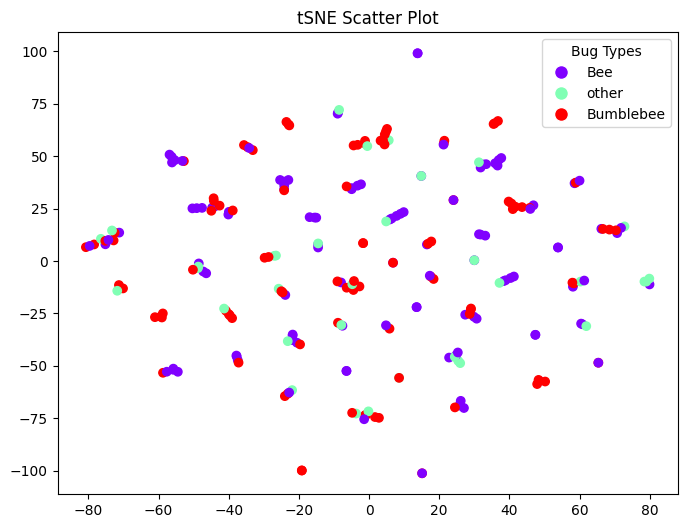

Perplexity:  1


C:\Users\Romain Chevrollier\AppData\Local\Temp\ipykernel_28576\4099325599.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow', len(bug_types))


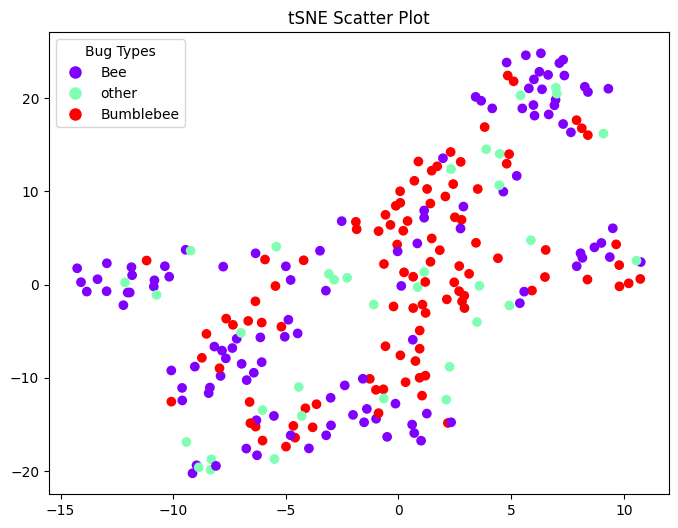

Perplexity:  26


C:\Users\Romain Chevrollier\AppData\Local\Temp\ipykernel_28576\4099325599.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow', len(bug_types))


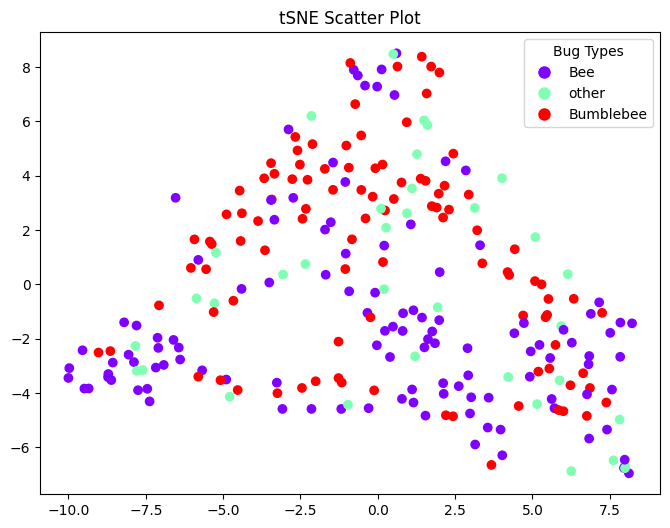

Perplexity:  51


C:\Users\Romain Chevrollier\AppData\Local\Temp\ipykernel_28576\4099325599.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow', len(bug_types))


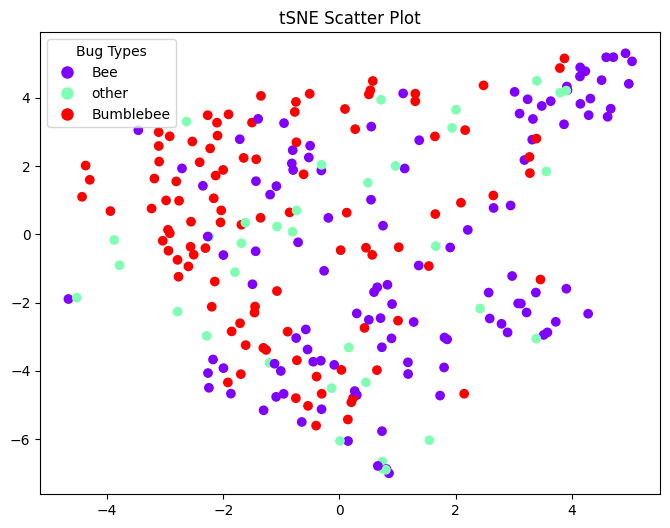

Perplexity:  76


C:\Users\Romain Chevrollier\AppData\Local\Temp\ipykernel_28576\4099325599.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow', len(bug_types))


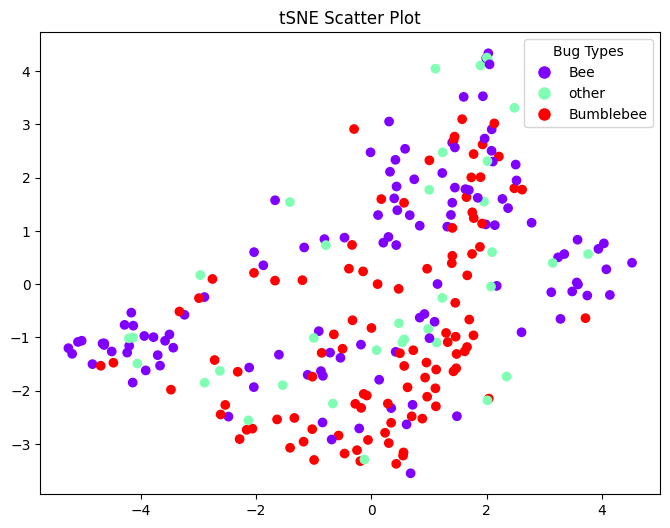

Perplexity:  101


C:\Users\Romain Chevrollier\AppData\Local\Temp\ipykernel_28576\4099325599.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow', len(bug_types))


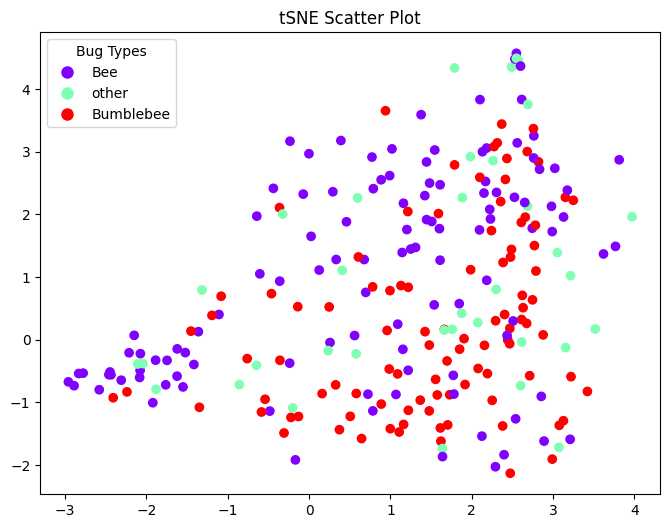

Perplexity:  126


C:\Users\Romain Chevrollier\AppData\Local\Temp\ipykernel_28576\4099325599.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow', len(bug_types))


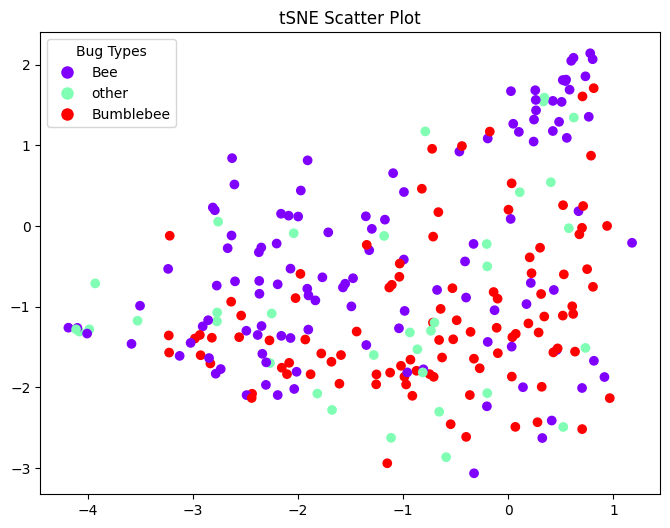

Perplexity:  151


C:\Users\Romain Chevrollier\AppData\Local\Temp\ipykernel_28576\4099325599.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow', len(bug_types))


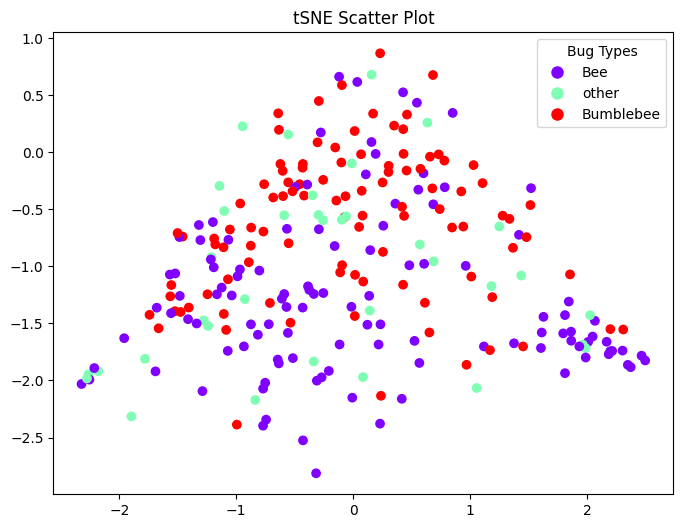

Perplexity:  176


C:\Users\Romain Chevrollier\AppData\Local\Temp\ipykernel_28576\4099325599.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow', len(bug_types))


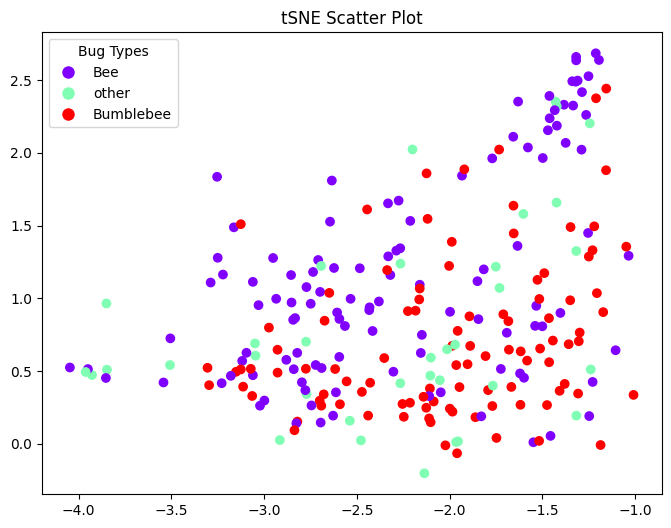

Perplexity:  201


In [48]:
for i in range (1,202, 25):

    # Create an instance of TSNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=i)

    # Fit and transform the data
    X_tSNE = tsne.fit_transform(X)
    # Assuming `X_pca` is your data transformed by PCA
    plt.figure(figsize=(8,6))
    bug_types = df_class['bug type'].unique()

    # Create a colormap
    cmap = cm.get_cmap('rainbow', len(bug_types))

    color_dict = {bug_type: cmap(i) for i, bug_type in enumerate(bug_types)}
    scatter = plt.scatter(X_tSNE[:,0], X_tSNE[:,1], c=df_class['bug type'].map(color_dict))

    # Create legend handles manually
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict[bug_type], markersize=10) for bug_type in bug_types]
    plt.legend(handles, bug_types, title="Bug Types")
    # plt.xlabel("PC1 ({0}% of explained variance)".format(explained_variances[0], fontsize=12))
    # plt.ylabel("PC2 ({0}% of explained variance)".format(explained_variances[1], fontsize=12))
    plt.title('tSNE Scatter Plot')
    plt.show()
    print('Perplexity: ', i)

#### **Correlation coefficient** 

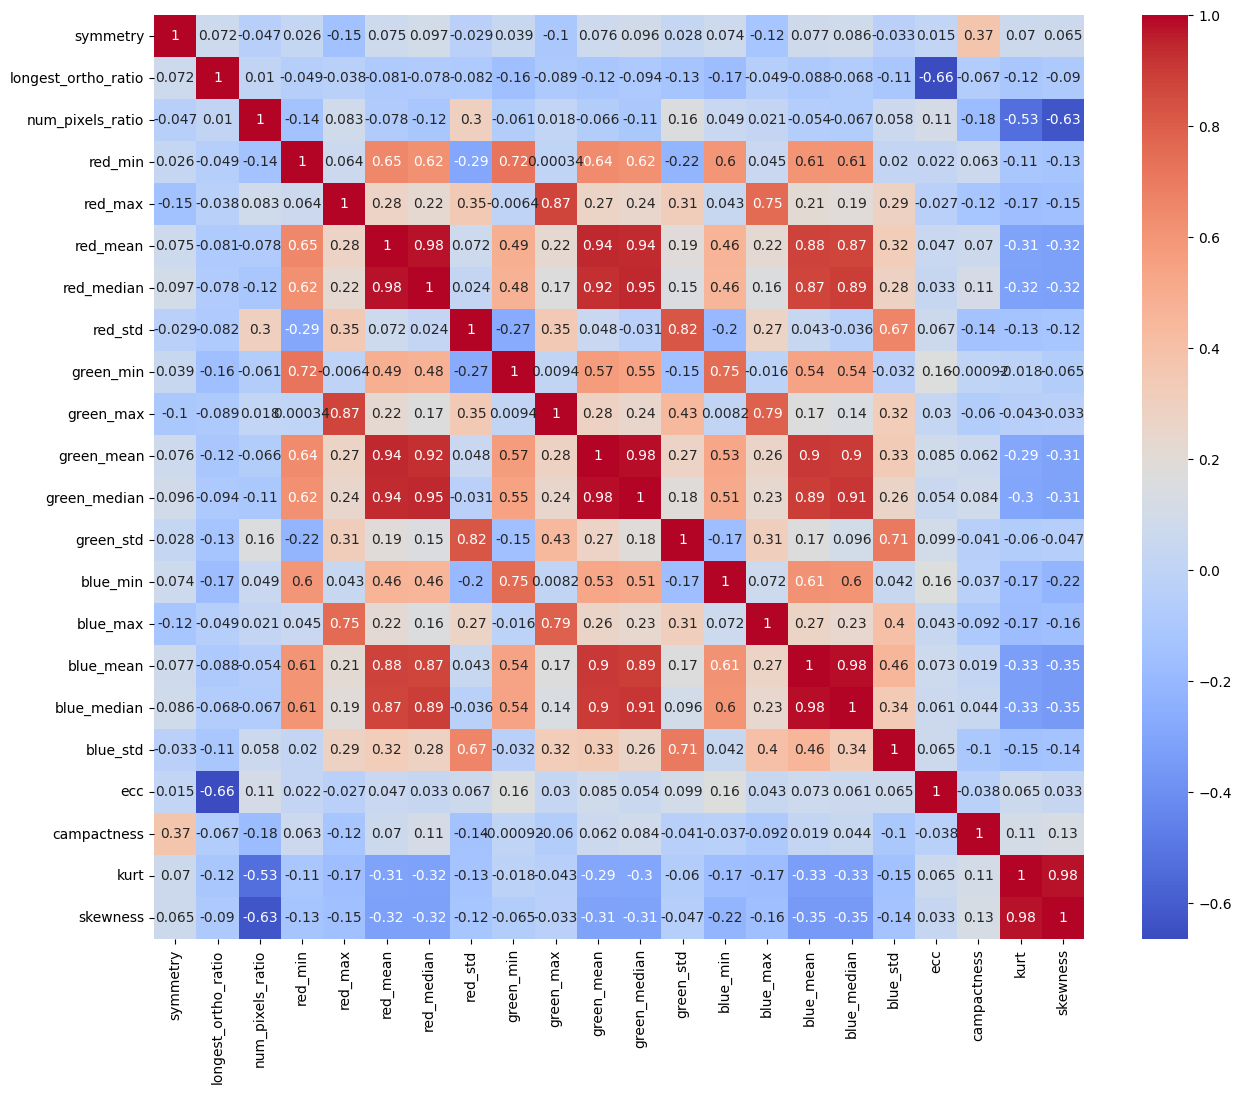

In [58]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 12))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # Draw the heatmap
plt.show()